Please Enter the Path for Training_Input_x2D:/ISIC2018_Task1-2_Training_Input_x2
Please Enter the Path for Training_GroundTruth_x2D:/ISIC2018_Task1_Training_GroundTruth_x2
No. of images in training folder=  2594
No. of images in test folder=  2594


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 256, 256, 16) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

Train on 1556 samples, validate on 519 samples
Epoch 1/50
1556/1556 [==============================] - 23s 15ms/step - loss: 0.5631 - accuracy: 0.6346 - dice_coeff: 0.4118 - val_loss: 0.4492 - val_accuracy: 0.7933 - val_dice_coeff: 0.5165

Epoch 00001: val_loss improved from inf to 0.44921, saving model to model-ISIC.h5
Epoch 2/50
1556/1556 [==============================] - 15s 9ms/step - loss: 0.4005 - accuracy: 0.8207 - dice_coeff: 0.6091 - val_loss: 0.4137 - val_accuracy: 0.8611 - val_dice_coeff: 0.5390

Epoch 00002: val_loss improved from 0.44921 to 0.41367, saving model to model-ISIC.h5
Epoch 3/50
1556/1556 [==============================] - 15s 9ms/step - loss: 0.3155 - accuracy: 0.8841 - dice_coeff: 0.6952 - val_loss: 0.2735 - val_accuracy: 0.9019 - val_dice_coeff: 0.7303

Epoch 00003: val_loss improved from 0.41367 to 0.27348, saving model to model-ISIC.h5
Epoch 4/50
1556/1556 [==============================] - 15s 9ms/step - loss: 0.2972 - accuracy: 0.8929 - dice_coeff: 0.717

1556/1556 [==============================] - 15s 9ms/step - loss: 0.1398 - accuracy: 0.9442 - dice_coeff: 0.8561 - val_loss: 0.1446 - val_accuracy: 0.9441 - val_dice_coeff: 0.8399

Epoch 00032: val_loss improved from 0.14774 to 0.14464, saving model to model-ISIC.h5
Epoch 33/50
1556/1556 [==============================] - 15s 9ms/step - loss: 0.1373 - accuracy: 0.9449 - dice_coeff: 0.8576 - val_loss: 0.1513 - val_accuracy: 0.9410 - val_dice_coeff: 0.8620

Epoch 00033: val_loss did not improve from 0.14464
Epoch 34/50
1556/1556 [==============================] - 15s 9ms/step - loss: 0.1360 - accuracy: 0.9453 - dice_coeff: 0.8600 - val_loss: 0.1466 - val_accuracy: 0.9441 - val_dice_coeff: 0.8701

Epoch 00034: val_loss did not improve from 0.14464
Epoch 35/50
1556/1556 [==============================] - 15s 9ms/step - loss: 0.1408 - accuracy: 0.9448 - dice_coeff: 0.8559 - val_loss: 0.1520 - val_accuracy: 0.9428 - val_dice_coeff: 0.8676

Epoch 00035: val_loss did not improve from 0.14464
E

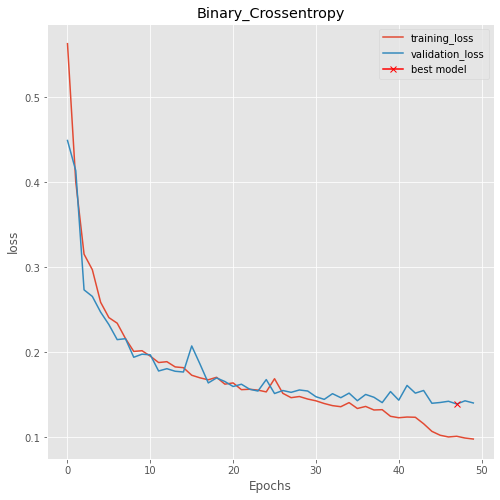

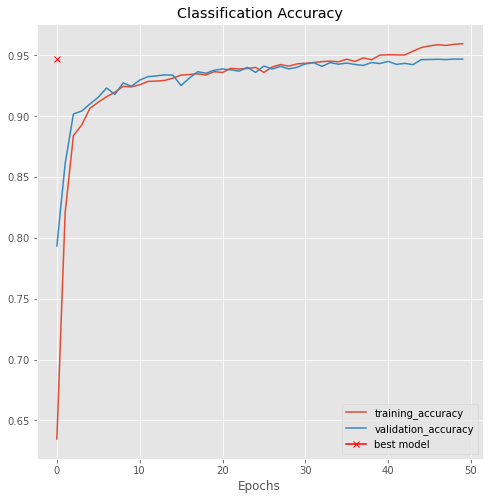

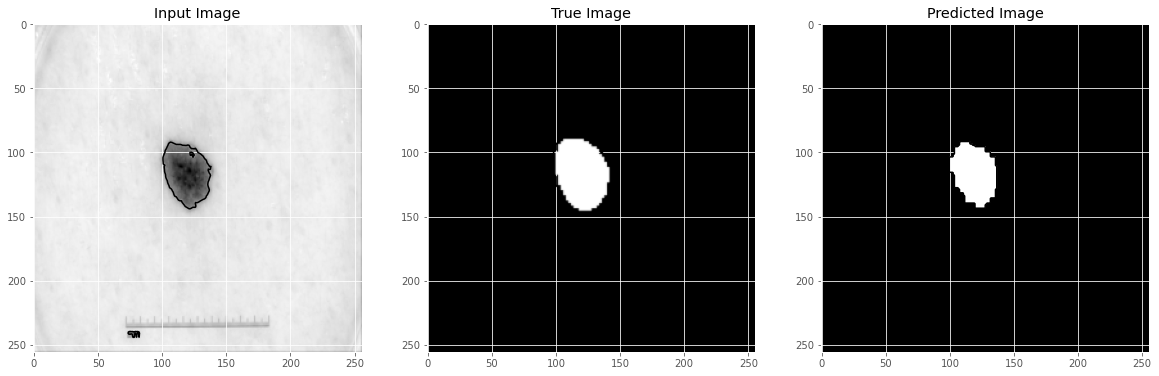

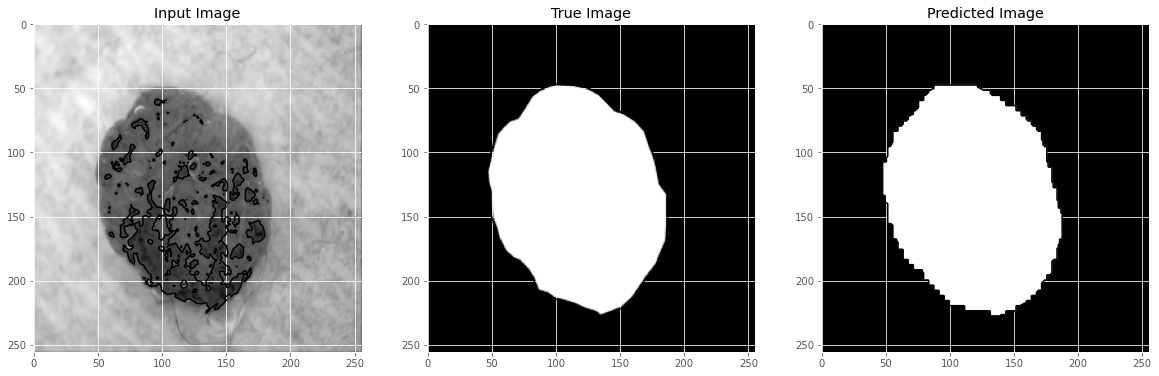

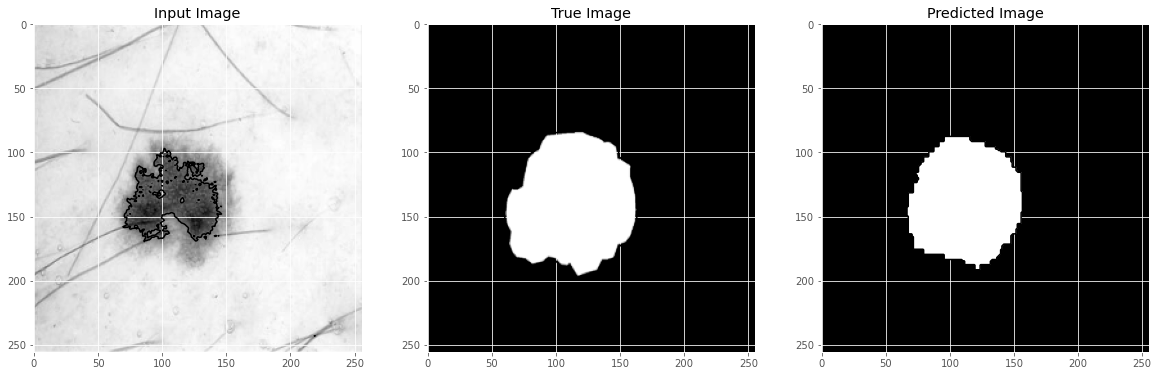

In [2]:
# Libraries used for this Project
import os # used for interaction with the operating system 
import random # used for picking up random varaibales
import pandas as pd # used for structuring the data in dataframe
import numpy as np # used for preprocessing the data in an matrix or array format
import matplotlib.pyplot as plt # used for ploting the images and graphs
plt.style.use("ggplot") # used to plot in ggplot style
%matplotlib inline
from tqdm import tqdm_notebook, tnrange # used for printing the status bar
from itertools import chain # used for iteration 
from skimage.io import imread, imshow, concatenate_images # Scikit learn package for reading, showing and concatinating image size
from skimage.transform import resize # Scikit learn package for resizing the image dimensions
from skimage.morphology import label
from sklearn.model_selection import train_test_split # Scikit learn package used for test train split
import tensorflow as tf # used for training inference of deep learning architecture
from keras.models import Model, load_model # Keras package used for defining the model
from keras.layers import Input, BatchNormalization,LeakyReLU, concatenate, Add, Activation, Dense, Dropout, Flatten # Keras package used for construsting the input, Batch Norm
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D  # Keras package used for defining the Convolution2D layers
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D # Keras package used for defining the MaxPool
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau # Keras package used for defining the calback for early stop
from keras.optimizers import Adam # Keras package used for defining the model optimizer as ADAM
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from tensorflow.keras import Sequential

%run Final_Project.ipynb


img_width = 256 # Defining the width of image
img_height =256 # Defining the Height of image
border = 5 # Defining the boder size

# Input from the User to prove the Folder Path of the ISICs Data Set
path_train = input("Please Enter the Path for Training_Input_x2")
path_seg = input("Please Enter the Path for Training_GroundTruth_x2")


def main():
    isic_train, isic_seg_train = path_for_dataset(path_train,path_seg)
    isic_train_sort,isic_seg_train_sort = sorted_test(isic_train, isic_seg_train)
    X_ISIC_train = Load_img(path_train+"/",isic_train_sort)
    Y_ISIC_train = Load_segmentation(path_seg+"/",isic_seg_train_sort)
    X_train, X_test, y_train, y_test, X_val, y_val = load_dataset(X_ISIC_train, Y_ISIC_train)
    Y_ISIC_train_cat, Y_ISIC_test_cat, Y_ISIC_val_cat = pre_processing(y_train,y_test,y_val)
    model = generat_unet() # calls the U-Net architecture for the specifid dataset
    model.compile(optimizer=Adam(learning_rate=5e-4), loss="binary_crossentropy", metrics=["accuracy",dice_coeff]) # compiling the model using the dice_loss
    model.summary()
    callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-ISIC.h5', verbose=1, save_best_only=True, save_weights_only=True)]
    results = model.fit(X_train, Y_ISIC_train_cat, batch_size=32, epochs=50, callbacks=callbacks,
                    validation_data=(X_val, Y_ISIC_val_cat))
    test_preds_reshape = best_model(model,X_test,y_test)
    loss_plot(results)
    acc_plot(results)
    #test_preds_reshape = best_model(X_test)
    plot_ISIc(X_test,y_test,test_preds_reshape)
    plot_ISIc(X_test,y_test,test_preds_reshape)
    plot_ISIc(X_test,y_test,test_preds_reshape)

if __name__ == "__main__":    
    main()    
